**Task 3: Customer Churn Prediction (Bank Customers)**

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/Churn Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Missing Data**

In [22]:
df.isnull().sum()     # Check missing data
df.info()             # Check data types and nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Drop Unnecessary Column**

In [23]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) #to drop Unnecessary Columns

**Encode Categorical Variables**

In [24]:
# Use one-hot encoding for Geography (multiple categories)
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

# Use label encoding for Gender (binary)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

**Train Classification Model**

In [25]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [26]:
#Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [27]:
#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
#Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
#Make predictions
y_pred = model.predict(X_test)

In [31]:
#Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy:", round(accuracy * 100, 2), "%")

✅ Accuracy: 78.5 %


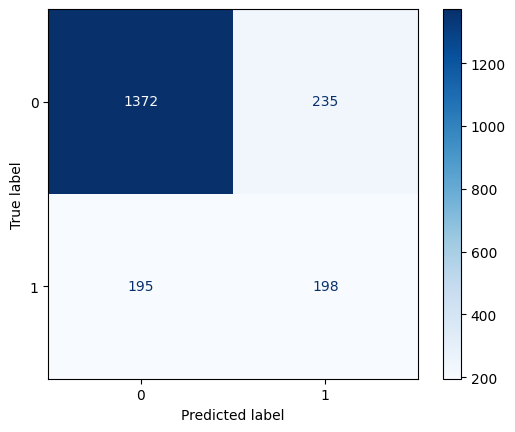

In [32]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")

**Supervised Classification Model**

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
X = df.drop('Exited', axis=1) #Split Features and Target
y = df['Exited']

In [36]:
scaler = StandardScaler() #Scale Features
X_scaled = scaler.fit_transform(X)

In [37]:
model = LogisticRegression() #Train Classifier
model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = model.predict(X_test) #Evaluate Model

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.811
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Confusion Matrix:
 [[1543   64]
 [ 314   79]]


**Understanding Feature Importance **

In [39]:
import pandas as pd #add important libraries
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [41]:
#Prepare features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

In [42]:
#Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)


DecisionTreeClassifier(random_state=42)

In [43]:
#Extract feature importances
importances = model.feature_importances_
feature_names = X.columns


In [44]:
#Create DataFrame for visualization
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

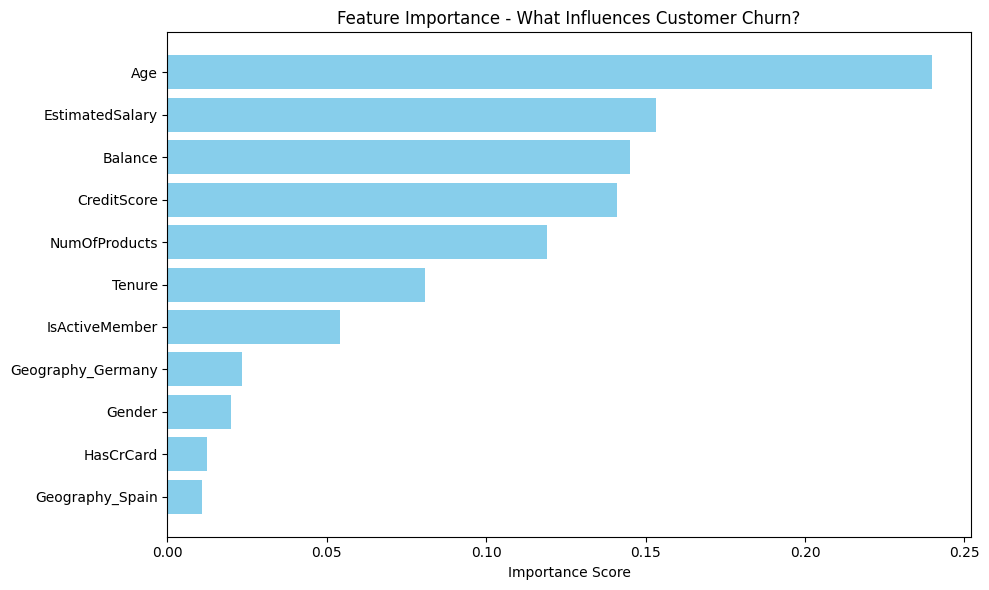

In [45]:
#Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['Feature'], feat_imp['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Feature Importance - What Influences Customer Churn?")
plt.tight_layout()
plt.show()